In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('heart.csv')

1. Take care of missing values

In [5]:
data.isnull () .sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

2. Taking duplicate values

In [11]:
data_dup = data.duplicated() .any()

In [7]:
data_dup

True

In [8]:
data = data.drop_duplicates()

In [9]:
data_dup = data.duplicated() .any()

In [10]:
data_dup

False

3. Data processing

In [12]:
cate_val = []
cont_val = []

for column in data.columns :
    if data[column].nunique () <=10:
        cate_val.append(column)
    else:
        cont_val.append (column)

In [13]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

4. Encoding Categorical Data

In [26]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [ ]:
cate_val.remove('sex')
cate_val,remove('target')

In [33]:
data = pd.get_dummies (data,columns = cate_val,drop_first = True)

In [34]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


5. Feature Scaling

In [35]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [38]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


6. Splitting the dataset into training and test set

In [39]:
X = data.drop('target',axis = 1)

In [45]:
y = data['target']


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [51]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

7. Logistic Regression

In [52]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [55]:
y_pred1 = log.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score (y_test,y_pred1)

0.7868852459016393

8. SVC

In [58]:
from sklearn import svm

In [59]:
svm = svm.SVC()

In [60]:
svm.fit(X_train,y_train)

SVC()

In [61]:
y_pred2 = svm.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

9. KNeighbors Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier()

In [65]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
y_pred3=knn.predict(X_test)

C:\Users\20059\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [78]:
accuracy_score (y_test,y_pred3)

0.7377049180327869

In [79]:
score = []

for k in range(1,40) :
    knn = KNeighborsClassifier (n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append (accuracy_score(y_test,y_pred))

C:\Users\20059\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\20059\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [80]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [82]:
knn = KNeighborsClassifier (n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\20059\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8032786885245902

NON-linear ml algo

In [83]:
data = pd.read_csv('heart.csv')

In [84]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [85]:
data = data.drop_duplicates()

In [86]:
data.shape

(302, 14)

In [87]:
X = data.drop('target',axis=1)
y = data['target']

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

10. Decision tree classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dt = DecisionTreeClassifier()

In [91]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [92]:
y_pred4= dt.predict(X_test)

In [93]:
accuracy_score(y_test,y_pred4)

0.7377049180327869

11. Random forest classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf = RandomForestClassifier()

In [97]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [98]:
y_pred5= rf.predict(X_test)

In [99]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

12. Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
gbc = GradientBoostingClassifier()

In [102]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [103]:
y_pred6= rf.predict(X_test)

In [104]:
accuracy_score(y_test,y_pred6)

0.8360655737704918

In [105]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC' :[accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),
                                  accuracy_score(y_test,y_pred6)]})

In [106]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.737705
4,RF,0.836066
5,GB,0.836066


In [107]:
import seaborn as sns

C:\Users\20059\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

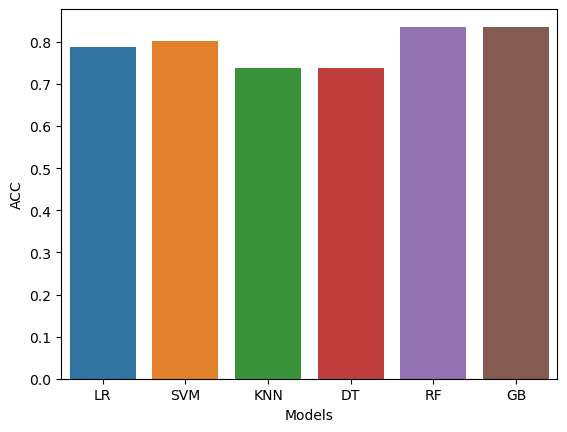

In [108]:
sns.barplot (final_data['Models'],final_data['ACC'])

In [109]:
X = data.drop('target',axis=1)
y=data['target']

In [110]:
X.shape

(302, 13)

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

# Prediction of new data

In [114]:
import pandas as pd

In [115]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [116]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [118]:
p = rf.predict (new_data)
if p[0] == 0:
    print("No Heart Disease")
else:
    print("You may have Heart Disease")


No Heart Disease


13. Save model using Joblib

In [119]:
import joblib

In [120]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [121]:
model = joblib.load('model_joblib_heart')

In [122]:
model.predict(new_data)

array([0], dtype=int64)

# GUI

In [123]:
from tkinter import * 
import joblib

In [127]:
def show_entry_fields():
    pl = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = float(e10.get())
    pll = int(ell.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    
    model = joblib.load('model_joblib_heart')  

    result = model.predict([[pl, p2, p3, p4, p5, p6, p7, p8, p9, p10, pll, p12, p13]])
    
    if result == 0:
        Label(master, text="No Heart Diseases").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Diseases").grid(row=31)

master = Tk()
master.title("Heart Diseases Prediction System")

Label(master, text="Enter Your Age:").grid(row=0)
Label(master, text="Male or Female(1/0):").grid(row=1)
Label(master, text="Enter Value of CP:").grid(row=2)
Label(master, text="Enter Value of trestbps:").grid(row=3)
Label(master, text="Enter Value of chol:").grid(row=4)
Label(master, text="Enter value of fbs:").grid(row=5)
Label(master, text="Enter value of restecg:").grid(row=6)
Label(master, text="Enter value of thalach:").grid(row=7)
Label(master, text="Enter value of exang:").grid(row=8)
Label(master, text="Enter value of oldpeak:").grid(row=9)
Label(master, text="Enter value of slope:").grid(row=10)
Label(master, text="Enter value of ca:").grid(row=11)
Label(master, text="Enter value of thal:").grid(row=12)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
ell = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)
e5.grid(row=4, column=1)
e6.grid(row=5, column=1)
e7.grid(row=6, column=1)
e8.grid(row=7, column=1)
e9.grid(row=8, column=1)
e10.grid(row=9, column=1)
ell.grid(row=10, column=1)
e12.grid(row=11, column=1)
e13.grid(row=12, column=1)

Button(master, text='Predict', command=show_entry_fields).grid(row=13, column=0, columnspan=2)
Label(master, text="", font=("Helvetica", 14)).grid(row=31, column=0, columnspan=2)
master.mainloop()